In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from jlinops import CGPseudoinverse, MatrixOperator
from jlinops import MatrixLinearOperator, QRPinvOperator
from scipy.linalg import null_space

from scipy.sparse.linalg import cg as scipy_cg
from jlinops import cg

from scipy.linalg import qr as scipy_qr
from scipy.linalg import solve_triangular as scipy_solve_triangular
#from scipy.sparse.linalg._interface import MatrixLinearOperator, _CustomLinearOperator
import scipy.sparse as sps

from scipy.sparse import diags
# from jlinops import SparseMatrixOperator

from jlinops import CGWeightedNeumann2DPinvOperator
#from jlinops import CGWeightedDiscreteGradientNeumann2DPseudoinverse

# Preconditioned pseudoinverse op

In [2]:
# class CGPreconditionedPseudoinverseOperator(_CustomLinearOperator):
#     """Returns a linear operator that approximately computes the pseudoinverse of a matrix A using 
#     a conjugate gradient method. Modifed so that it only ever solves systems with A^T A. 
#     """

#     def __init__(self, operator, W, Wpinv, Lpinv, Ltpinv, warmstart_prev=True, which="jlinops", *args, **kwargs):

#         assert which in ["jlinops", "scipy"], "Invalid choice for which!"

#         # Store operator
#         self.original_op = operator
#         self.W = W
#         self.Wpinv = Wpinv
#         self.Lpinv = Lpinv
#         self.Ltpinv = Ltpinv

#         # Setup
#         self.which = which
#         self.in_shape = self.original_op.shape[0]
#         self.out_shape = self.original_op.shape[1]
#         self.prev_eval = np.zeros(self.out_shape)
#         self.prev_eval_t = np.zeros(self.out_shape)
#         self.warmstart_prev = warmstart_prev

#         # Build both operators we need
#         self.AtA = self.original_op.T @ self.original_op
#         self.Q = self.Lpinv @ self.AtA @ self.Ltpinv

#         # Define matvec and rmatvec
#         def _matvec(x):
#             if self.which == "scipy":
#                 sol, converged = scipy_cg(self.Q, self.Lpinv @ (self.original_op.T @ x), x0=self.prev_eval, *args, **kwargs) 
#                 assert converged == 0, "CG algorithm did not converge!"
#             elif self.which == "jlinops":
#                 solver_data = cg(self.Q, self.Lpinv @ (self.original_op.T @ x), x0=self.prev_eval, *args, **kwargs)
#                 sol = solver_data["x"]
#             else:
#                 raise ValueError

#             if self.warmstart_prev:
#                 self.prev_eval = sol.copy()

#             return self.Ltpinv @ sol
        
#         def _rmatvec(x):

#             # Project x onto range(A^T A) = range(A^T).
#             x = x - (self.W @ (self.Wpinv @ x))

#             if self.which == "scipy":
#                 sol, converged = scipy_cg(self.Q, self.Lpinv @ x, x0=self.prev_eval_t, *args, **kwargs) 
#                 assert converged == 0, "CG algorithm did not converge!"
#             elif self.which == "jlinops":
#                 solver_data = cg(self.Q, self.Lpinv @ x, x0=self.prev_eval_t, *args, **kwargs)
#                 sol = solver_data["x"]
#             else:
#                 raise ValueError

#             if self.warmstart_prev:
#                 self.prev_eval_t = sol.copy()
                
#             return self.original_op @ (self.Ltpinv @ sol)
        
#         super().__init__( (self.out_shape, self.in_shape), _matvec, _rmatvec, dtype=np.float64 )


# Neumann gradient 2D

In [3]:
from jlinops import Neumann2D

In [4]:
m, n = 5, 8
R = Neumann2D( (m,n) )

In [5]:
# Extract matrix form of R
out_size, in_size = R.shape
grad_op_mat_rep = np.zeros((out_size, in_size))

for j in range(in_size):
    tmp = np.zeros(in_size)
    tmp[j] = 1.0
    op_tmp = R @ tmp
    grad_op_mat_rep[:,j] = op_tmp.copy()

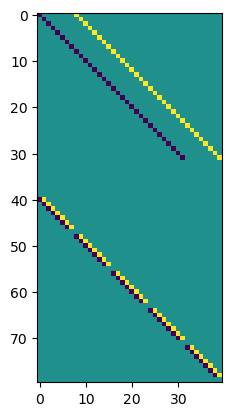

In [6]:
plt.imshow(grad_op_mat_rep)
plt.show()

In [40]:
Rh = -1*np.eye(n)
i = np.arange(Rh.shape[0] - 1)
Rh[i, i+1] = 1
Rh[-1,-1] = 0

In [41]:
Rh

array([[-1.,  1., -0., -0., -0., -0., -0., -0.],
       [-0., -1.,  1., -0., -0., -0., -0., -0.],
       [-0., -0., -1.,  1., -0., -0., -0., -0.],
       [-0., -0., -0., -1.,  1., -0., -0., -0.],
       [-0., -0., -0., -0., -1.,  1., -0., -0.],
       [-0., -0., -0., -0., -0., -1.,  1., -0.],
       [-0., -0., -0., -0., -0., -0., -1.,  1.],
       [-0., -0., -0., -0., -0., -0., -0.,  0.]])

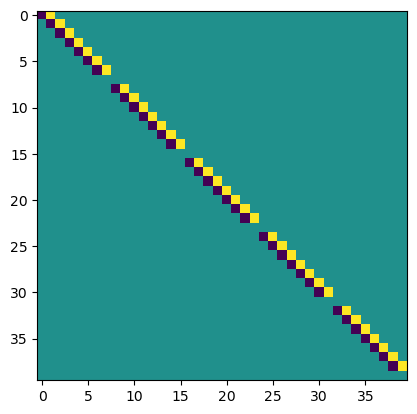

In [49]:
plt.imshow( np.kron(np.eye(m), Rh) )
plt.show()

In [50]:
Rv = -1*np.eye(m)
i = np.arange(Rv.shape[0] - 1)
Rv[i, i+1] = 1
Rv[-1,-1] = 0

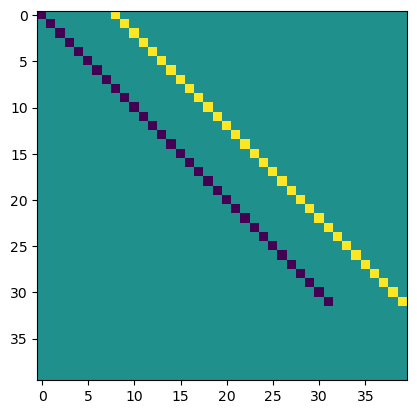

In [53]:
plt.imshow( np.kron(Rv, np.eye(n)) )

In [58]:
 np.kron(Rv, np.eye(n))

array([[-1., -0., -0., ..., -0., -0., -0.],
       [-0., -1., -0., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.]])

In [59]:
m, n

(5, 8)

In [60]:
Rv.shape

(5, 5)

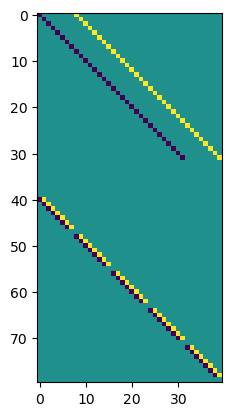

In [56]:
plt.imshow(  np.vstack([np.kron(Rv, np.eye(n)), np.kron(np.eye(m), Rh) ])  )
plt.show(

)

In [57]:
np.linalg.norm( grad_op_mat_rep -  np.vstack([np.kron(Rv, np.eye(n)), np.kron(np.eye(m), Rh) ]) )

0.0

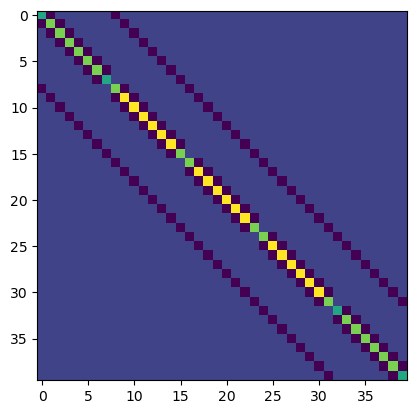

In [62]:
plt.imshow( grad_op_mat_rep.T @ grad_op_mat_rep )
plt.show()

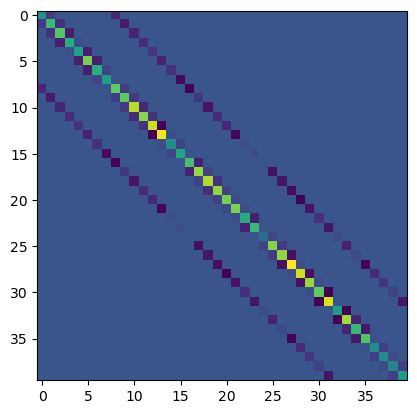

In [63]:
plt.imshow( grad_op_mat_rep.T @ np.diag(weights) @ grad_op_mat_rep )
plt.show()

In [64]:
A1 = grad_op_mat_rep.T @ grad_op_mat_rep 
A2 = grad_op_mat_rep.T @ np.diag(weights) @ grad_op_mat_rep

In [68]:
P1 = np.linalg.eigh(A1).eigenvectors
P2 = np.linalg.eigh(A2).eigenvectors

In [75]:
P2[:,0]

array([0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388,
       0.15811388, 0.15811388, 0.15811388, 0.15811388, 0.15811388])

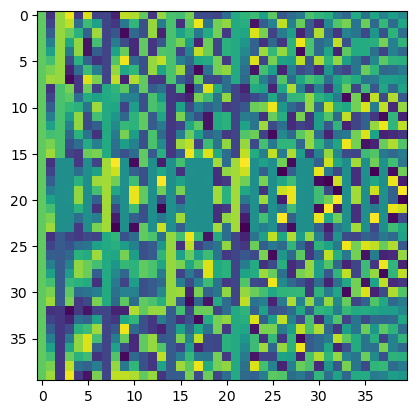

In [71]:
plt.imshow(P1)

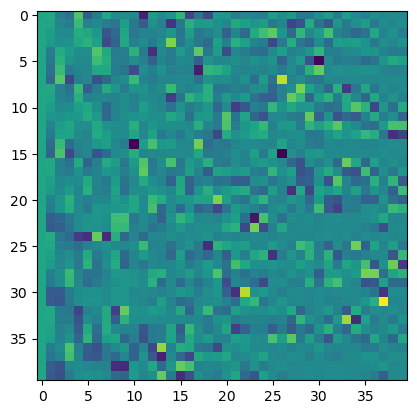

In [72]:
plt.imshow(P2)

# Function that builds Lpinv and Ltpinv

In [7]:
from scipy.fft import dctn, idctn
from scipy.sparse.linalg import LinearOperator

In [8]:
def dct_diagonalized_operator_get_eigvals(A, grid_shape):
    """Given a LinearOperator A that is diagonalized by the 2-dimensional DCT, computes its eigenvalues.
    """
    M, N = grid_shape
    v = np.random.normal(size=(M,N)) + 10.0
    tmp = A @ ( idctn( v, norm="ortho" ).flatten()  )
    tmp = tmp.reshape((M,N))
    tmp = dctn( tmp, norm="ortho" ).flatten()
    res = tmp/v.flatten()
    return res


In [9]:
eigvals = dct_diagonalized_operator_get_eigvals(R.T @ R, (m,n))
eigvals

array([0.        , 0.15224093, 0.58578644, 1.23463314, 2.        ,
       2.76536686, 3.41421356, 3.84775907, 0.38196601, 0.53420695,
       0.96775245, 1.61659915, 2.38196601, 3.14733288, 3.79617957,
       4.22972508, 1.38196601, 1.53420695, 1.96775245, 2.61659915,
       3.38196601, 4.14733288, 4.79617957, 5.22972508, 2.61803399,
       2.77027492, 3.20382043, 3.85266712, 4.61803399, 5.38340085,
       6.03224755, 6.46579305, 3.61803399, 3.77027492, 4.20382043,
       4.85266712, 5.61803399, 6.38340085, 7.03224755, 7.46579305])

In [10]:
def build_Lpinv(A, grid_shape):
    """Given a LinearOperator A that is diagonalized by the DCT, performs the diagonalization (computes eigenvalues),
    computes the square root E in M = E E^T, and returns a LinearOperator representing E^{-1}.

    This can be used as a preconditioner. Instead of solving A x = b, it is equivalent to solve
        E^{-1} A E^{-T} w = E^{-1} b
    and recovering x = E^{-T} w.
    """
    # Get eigenvalues
    eigvals = dct_diagonalized_operator_get_eigvals(A, grid_shape)
    print(np.amin(eigvals))
    print(np.abs(np.amin(eigvals)) < 1e-14)

    # Take reciprocals of nonzero eigenvalues
    recip_eigvals = np.where(np.abs(eigvals) < 1e-14, eigvals, 1.0 / eigvals)
    recip_eigvals = np.where(np.abs(eigvals) < 1e-14, np.zeros_like(eigvals), recip_eigvals)


    # Shape
    M, N = grid_shape

    def _matvec(x):
        x = x.reshape(grid_shape)
        tmp = dctn( x, norm="ortho" ).flatten()
        tmp = np.sqrt(recip_eigvals)*tmp
        return tmp
    
    def _rmatvec(x):
        tmp = np.sqrt(recip_eigvals)*x
        tmp = tmp.reshape(grid_shape)
        tmp = idctn( tmp, norm="ortho" ).flatten()
        return tmp

    Lpinv = LinearOperator(A.shape, matvec=_matvec, rmatvec=_rmatvec)

    return Lpinv

In [11]:
Lpinv = build_Lpinv(R.T @ R, (m,n))

0.0
True


/var/folders/8y/4mq6cs_x20j1gp06wytwhlwm0000gn/T/ipykernel_9741/2383819813.py:15: RuntimeWarning: divide by zero encountered in divide
  recip_eigvals = np.where(np.abs(eigvals) < 1e-14, eigvals, 1.0 / eigvals)


# W

In [12]:
W = null_space(grad_op_mat_rep)
W = MatrixLinearOperator(W)
Wpinv = QRPinvOperator(W.A)

# Put together

In [13]:
w = np.random.uniform(low=1, high=1, size=R.shape[0])
Apinv = CGWeightedNeumann2DPinvOperator((m,n), w)

In [14]:
Apinv.shape

(40, 80)

In [15]:
z = np.random.normal(size=80)
np.linalg.norm( Apinv.matvec( z ) - np.linalg.pinv(grad_op_mat_rep) @ z )

1.3020915299481635e-14

In [16]:
z = np.random.normal(size=40)
np.linalg.norm( Apinv.rmatvec( z ) - np.linalg.pinv(grad_op_mat_rep.T) @ z )

1.0195006741477847e-14

# Weight it

In [17]:
l, u = 1e-1, 1e1
np.random.seed(0)
weights = np.random.uniform(low=l, high=u, size=R.shape[0])
Dwmat = np.diag(weights)
Dw = MatrixLinearOperator(Dwmat)
Rtilde = Dw @ R

In [28]:
Apinv = CGWeightedNeumann2DPinvOperator((m,n), weights, tol=1e-3)

In [29]:
z = np.random.normal(size=80)
np.linalg.norm( Apinv.matvec( z ) - np.linalg.pinv(Dwmat @ grad_op_mat_rep) @ z )

0.0012650790742436823

In [30]:
z = np.random.normal(size=40)
np.linalg.norm( Apinv.rmatvec( z ) - np.linalg.pinv(grad_op_mat_rep.T @ Dwmat) @ z )

0.0010192823188145664

# Weight and do for very large example!

In [263]:
m, n = 50, 50
R = DiscreteGradientNeumann2D( (m,n) )

# Lpinv
Lpinv = build_Lpinv(R.T @ R, (m,n))

# W
W = np.atleast_2d(np.ones(R.shape[1])).T
W = MatrixOperator(W)
Wpinv = QRPseudoInverseOperator(W)



3.3696728562823657e-16
True


In [207]:

# Extract matrix form of R
out_size, in_size = R.shape
grad_op_mat_rep = np.zeros((out_size, in_size))

for j in range(in_size):
    tmp = np.zeros(in_size)
    tmp[j] = 1.0
    op_tmp = R @ tmp
    grad_op_mat_rep[:,j] = op_tmp.copy()

In [264]:
# Pseudoinverse
Apinv = CGPreconditionedPseudoinverseOperator(R, W, Wpinv, Lpinv, Lpinv.T, eps=1e-3)

In [265]:
Apinv.shape

(2500, 5000)

In [268]:
grad_op_pinv = np.linalg.pinv(grad_op_mat_rep)

In [269]:
z = np.random.normal(size=5000)
np.linalg.norm( Apinv.matvec( z ) - (grad_op_pinv @ z) )

4.54595651084539e-12

In [222]:
z = np.random.normal(size=2500)
np.linalg.norm( Apinv.rmatvec( z ) - (grad_op_pinv.T @ z) )

6.71068276079514e-12

In [230]:
l, u = 1e-1, 1e1
np.random.seed(0)
weights = np.random.uniform(low=l, high=u, size=R.shape[0])

Dw = diags(weights)
Dw = SparseMatrixOperator(Dw)


Rtilde = Dw @ R

In [242]:
Apinv = CGPreconditionedPseudoinverseOperator(Rtilde, W, Wpinv, Lpinv, Lpinv.T, eps=1e-6)

/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:39: RuntimeWarning: invalid value encountered in double_scalars
  rel_residual_norm = residual_norm/bnorm
/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:44: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (r.T @ r)/(d.T @ A.matvec(d) )


In [243]:
z = np.random.normal(size=5000)
Apinv.matvec(z)

array([ 0.09342456,  0.09652901, -0.02343534, ..., -0.04644347,
        0.24212912,  0.06297604])

In [237]:
grad_op_pinv = np.linalg.pinv(np.diag(weights) @ grad_op_mat_rep)

In [252]:
z = np.random.normal(size=5000)
np.linalg.norm( Apinv.matvec( z ) - (grad_op_pinv @ z) )

2.9238939001955866e-05

In [261]:
z = np.random.normal(size=2500)
np.linalg.norm( Apinv.rmatvec( z ) - (grad_op_pinv.T @ z) )

1.1641823402876251e-05

In [253]:
Apinv.shape

(2500, 5000)

# Stupidly large example

In [322]:
m, n = 256, 256
R = DiscreteGradientNeumann2D( (m,n) )

# Lpinv
Lpinv = build_Lpinv(R.T @ R, (m,n))

# W
W = np.atleast_2d(np.ones(R.shape[1])).T
W = MatrixOperator(W)
Wpinv = QRPseudoInverseOperator(W)

# Weights
l, u = 1e-1, 1e0
np.random.seed(0)
weights = np.random.uniform(low=l, high=u, size=R.shape[0])

Dw = diags(weights)
Dw = SparseMatrixOperator(Dw)


# Make op
Rtilde = Dw @ R


# Make pseudoinverse 
Apinv = CGPreconditionedPseudoinverseOperator(Rtilde, W, Wpinv, Lpinv, Lpinv.T, eps=1e-2)

-2.8619961430493507e-16
True


In [325]:
np.random.seed(0)
z = np.random.normal(size=Apinv.shape[1])
Apinv.matvec(z)

array([-0.90264644, -0.20305595, -0.6107864 , ..., -0.74839322,
        0.43571692, -0.30842561])

In [326]:
np.random.seed(0)
z = np.random.normal(size=Apinv.shape[1])
Apinv.matvec(z)

array([-0.90264644, -0.20305595, -0.6107864 , ..., -0.74839322,
        0.43571692, -0.30842561])

In [319]:
np.random.seed(0)
z = np.random.normal(size=Apinv.shape[1])
Apinv.matvec(z)

array([-0.90264644, -0.20305595, -0.6107864 , ..., -0.74839322,
        0.43571692, -0.30842561])

In [333]:
# np.random.seed(0)
z = np.random.normal(size=Apinv.shape[0])
Apinv.rmatvec(z)

array([-0.06638821,  1.09271439,  0.91799749, ...,  0.49293683,
        0.81539141,  0.        ])

# Special preconditioned weighted gradient pseudoinverse

In [ ]:
class CGWeightedDiscreteGradientNeumann2DPseudoinverse(_CustomLinearOperator):
    """Represents the pseudoinverse (D_w R)^\dagger of a linear operator D_w R, where
    D_w is a diagonal matrix of weights and R is a DiscreteGradientNeumann2D operator.
    Here matvecs/rmatvecs are applied approximately using a preconditioned conjugate
    gradient method, where the preconditioner is based on the operator with identity weights. 
    """

    def __init__(self, grid_size, weights, *args, **kwargs):


        # 


        op = CGPreconditionedPseudoinverseOperator



# Use new class

In [22]:
m, n = 500, 500

weights = np.random.uniform(low=1e-1, high=0.5*1e0, size=2*m*n)
Rwpinv = CGWeightedDiscreteGradientNeumann2DPseudoinverse((m,n), weights=weights, eps=1e-5)


In [23]:
z = np.random.normal(size=Rwpinv.shape[1])
_ = Rwpinv @ z

In [4]:
# Extract matrix form of R
R = Rwpinv.Rw
out_size, in_size = R.shape
grad_op_mat_rep = np.zeros((out_size, in_size))

for j in range(in_size):
    tmp = np.zeros(in_size)
    tmp[j] = 1.0
    op_tmp = R @ tmp
    grad_op_mat_rep[:,j] = op_tmp.copy()

In [4]:
Rwpinv_exact = np.linalg.pinv(grad_op_mat_rep)

In [5]:
z = np.random.normal(size=Rwpinv.shape[1])
np.linalg.norm( (Rwpinv @ z) - (Rwpinv_exact @ z) )

0.0010929432856956166

In [6]:
z = np.random.normal(size=Rwpinv.shape[1])
np.linalg.norm( (Rwpinv @ z) - (Rwpinv_exact @ z) )

0.001123737965478582

In [7]:
z = np.random.normal(size=Rwpinv.shape[0])
np.linalg.norm( (Rwpinv.T @ z) - (Rwpinv_exact.T @ z) )

0.0006141588788609933

In [8]:
Rwpinv.weights = 0*np.random.uniform(low=1e-1, high=1e5, size=2*m*n) + 3

In [10]:
z = np.random.normal(size=Rwpinv.shape[0])
np.linalg.norm( (Rwpinv.T @ z) - (Rwpinv_exact.T @ z) )

0.0005863821679208212